### Excercise: Run the same analysis using 42K points with various values of perplexity and iterations.

 If you use all of the points, you can expect plots like this blog below:
 http://colah.github.io/posts/2014-10-Visualizing-MNIST/

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn import decomposition #PCA

from scipy.linalg import eigh # PCA using eigen optimisation

In [4]:
dt = pd.read_csv('../data/digit-recognizer/train.csv') 

print(dt.head(5))

# Let save the label column into a variable l
l = dt['label']

# Drop the label column from the table and save new table to d
d = dt.drop("label", axis=1)

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [5]:
d.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


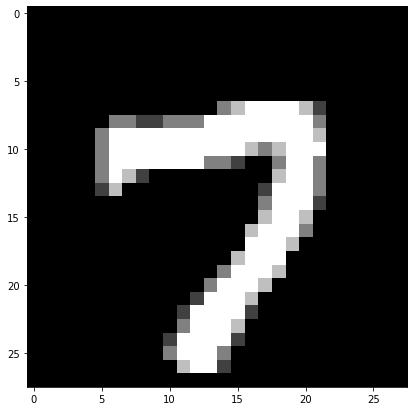

7


In [7]:
plt.figure(figsize=(7,7))
idx = 41997

grid_data = d.iloc[idx].to_numpy().reshape(28,28) # reshape from 1d to 2d
plt.imshow(grid_data, interpolation = "none", cmap= "gray")
plt.show()

print(l[idx]) # the corresponding label value


## 2D Visualization using PCA

In [9]:
labels = l.head(42000)
data = d.head(42000)

print("The shape of sample data = ", data.shape)

The shape of sample data =  (42000, 784)


In [10]:

standardized_data = StandardScaler().fit_transform(data)

print(standardized_data.shape)

(42000, 784)


In [11]:
# find the co-variance matrix which is : A^T * A

sample_data = standardized_data

# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T, sample_data) # sample_data is A then A^T * A

print("The shape of co-variance matrix = ", covar_matrix.shape)

The shape of co-variance matrix =  (784, 784)


In [12]:
# finding the top two eigen-value and coressponding eigen-vectors
# for projecting onto 2-Dim space



values, vectors = eigh(covar_matrix, eigvals=(782, 783))

print("shape of eigen vectors = ", vectors.shape)

# converting the eigen vector into 2D
vectors = vectors.T

print("Updated shape of eigen vectors = ", vectors.shape)

shape of eigen vectors =  (784, 2)
Updated shape of eigen vectors =  (2, 784)


In [13]:
new_coordinates = np.matmul(vectors, sample_data.T)

print("resultant new date points' shape ", vectors.shape, "X", sample_data.T.shape, "=", new_coordinates.shape)

resultant new date points' shape  (2, 784) X (784, 42000) = (2, 42000)


In [14]:
# appending label to the 2d projected data
new_coordinates = np.vstack((new_coordinates, labels)).T

dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -5.226445      -5.140478    1.0
1       6.032996      19.292332    0.0
2      -1.705813      -7.644503    1.0
3       5.836139      -0.474207    4.0
4       6.024818      26.559574    0.0


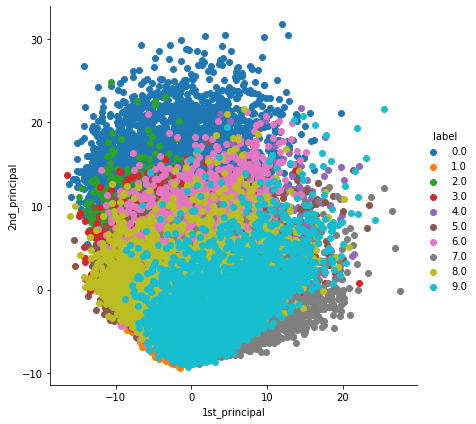

In [15]:
sn.FacetGrid(dataframe, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()

plt.show()

# PCA using Scikit-Learn

In [16]:

pca = decomposition.PCA()



In [17]:
# configuring the parameter

pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

# pca_reduced will contain the 2D projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)

shape of pca_reduced.shape =  (42000, 2)


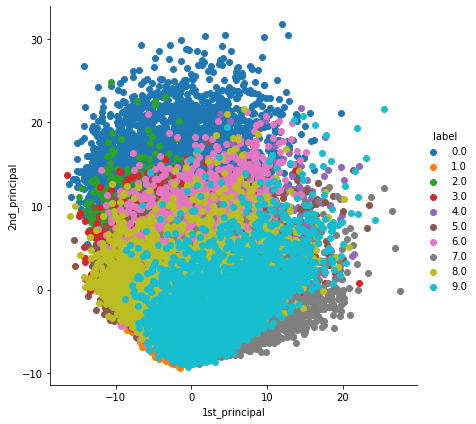

In [18]:
pca_data = np.vstack((pca_data.T, labels)).T

# create a new data frame for ploting the data
pca_df = pd.DataFrame(data=pca_data, columns = ("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(dataframe, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()

plt.show()

# PCA for dimensionality reduction(not for visualization)

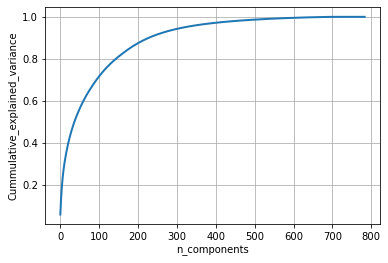

In [20]:
pca.n_components = 784
pca_data = pca.fit_transform(sample_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)

cum_var_explained = np.cumsum(percentage_var_explained)

# plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cummulative_explained_variance')
plt.show()

#If we take 250-dimensions, approx. 90% of variance is explained

# t-distribution Stochastic Neighborhood Embedding (t-SNE)

C:\Users\DHREY\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


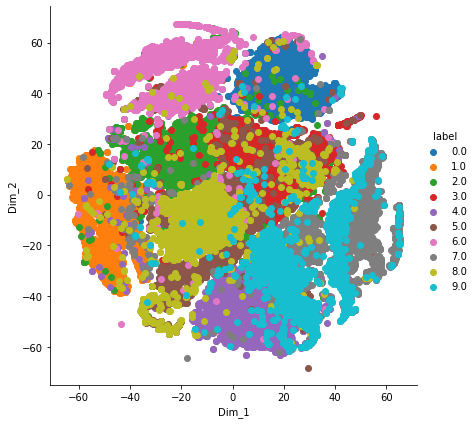

In [22]:
# TSNE

# Picking the top 1000 points as TSNE takes a lot of time for 15K points
data_42k = standardized_data[0:42000,:]
labels_42k = labels[0:42000]

model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(data_42k)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_42k)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

In [ ]:
model = TSNE(n_components=2, random_state=0, perplexity=50, n_iter=5000)

tsne_data = model.fit_transform(data_42k) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_42k)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50 and Iteration = 5000')
plt.show()

In [ ]:
model = TSNE(n_components=2, random_state=0, perplexity=50)

tsne_data = model.fit_transform(data_42k) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_42k)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50')
plt.show()